# Pytorch testing from scratch

In [7]:
import torch
from IPython.core.debugger import set_trace

In [10]:
def f(x):
    res = x * x
    set_trace()
    return res

In [ ]:
x = torch.rand(1,requires_grad=True)
y = f(x)
y

> <ipython-input-10-c8cd44c9bd1b>(4)f()
      1 def f(x):
      2     res = x * x
      3     set_trace()
----> 4     return res

ipdb> x
tensor([0.0894], requires_grad=True)


### Simple tests

In [2]:
import torch
from torch import autograd

In [5]:
w = torch.ones(1)
w.requires_grad

False

In [7]:
z = torch.ones(1)*2
z.requires_grad

False

In [8]:
total = w + z
total

tensor([3.])

In [9]:
# what is going to happen here?
total.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Trying with the gradients

In [18]:
w = torch.ones(1,requires_grad=True)
w.requires_grad

True

In [19]:
total = w + z
total.requires_grad

True

In [20]:
total.backward()

In [21]:
w.grad

tensor([1.])

In [22]:
with torch.no_grad():
    total = w + z

total.requires_grad

False

In [23]:
torch.__version__

'0.4.1'

How do I use the GPU?

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [27]:
data = torch.eye(3)
data.to(device)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### Linear regression using PyTorch

In [42]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [47]:
np.random.seed(72)
n_features = 1
n_samples = 100

In [48]:
np.random.seed(72)
X,y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=10
)

In [49]:
X[:10]

array([[-0.50001302],
       [ 1.5454002 ],
       [ 0.5179863 ],
       [-1.5087712 ],
       [ 0.62954519],
       [-1.66595597],
       [-0.92466567],
       [-0.90913811],
       [-1.54050519],
       [-0.80932451]])

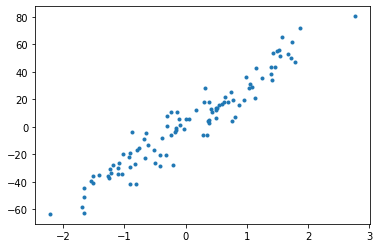

In [50]:
fix, ax = plt.subplots()
ax.plot(X,y,".")